<a href="https://colab.research.google.com/github/PabloAndagana/Tarea-2-Mecanica-Estadistica--PUC/blob/main/Problema_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problema 1

In [26]:
import random
import numpy as np
import matplotlib.pyplot as plt

def direct_pi(N):
  N_hits = 0

  for i in range(N):
    x = random.uniform(-1, 1)
    y = random.uniform(-1, 1)
    if x**2 + y**2 <= 1:
      N_hits += 1

  return N_hits

#Creamos los valores en los que se va a correr la función y el arreglo para
#almacenar la desviación estandar

N_vals = [10, 100, 1000, 10000, 100000, 1000000, 10000000]
desvs_std = []

for N in N_vals:
  desvs = []
  for i in range(20):
    N_hits = direct_pi(N)
    desv = (N_hits/N - np.pi/4)**2
    desvs.append(desv)

  desv_std = np.sqrt(np.mean(desvs))
  desvs_std.append(desv_std)
  print(f'N = {N}, Desviacion cuadrática media: {desv_std}')

N = 10, Desviacion cuadrática media: 0.1332404967414654
N = 100, Desviacion cuadrática media: 0.04946867039933769
N = 1000, Desviacion cuadrática media: 0.010872670426348756
N = 10000, Desviacion cuadrática media: 0.004765682509306266
N = 100000, Desviacion cuadrática media: 0.0014967382444962434
N = 1000000, Desviacion cuadrática media: 0.00047822074826258347
N = 10000000, Desviacion cuadrática media: 0.00010253432565593706


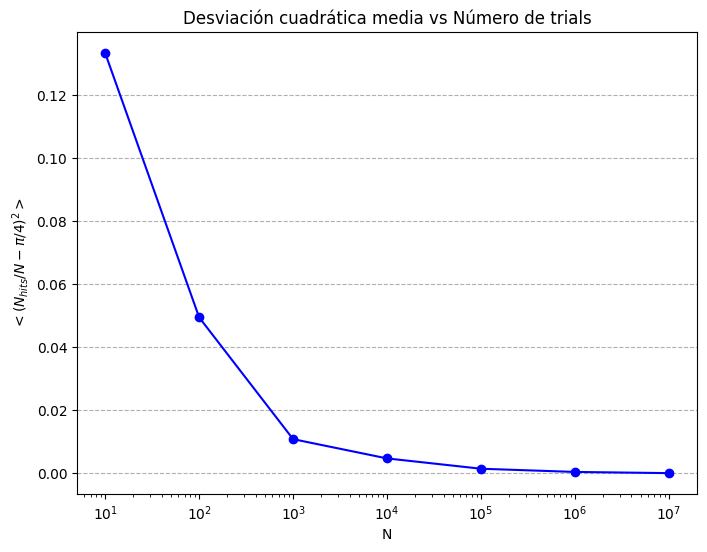

In [27]:
plt.figure(figsize=(8, 6))
plt.plot(N_vals, desvs_std, marker='o', linestyle='-', color='blue')
plt.xlabel('N')
plt.xscale('log')
plt.ylabel('$<(N_{hits}/N - \pi/4)^2>$')
plt.title('Desviación cuadrática media vs Número de trials')
plt.grid(True, axis = 'y', ls="--")
plt.show()

Para determinar como escala  la desviación cuadrática media con N, tomamos de forma logaritmica ambas listas y se hace una regresión lineal donde la pendiente $m$ será el factor del exponente:

In [34]:
log_N_vals = np.log10(N_vals)
log_desvs_std = np.log10(desvs_std)
m,b = np.polyfit(log_N_vals, log_desvs_std, 1)
print(f'Exponente de escala: {m}')

Exponente de escala: -0.5082819608932465


Se ha encontrado que:

 *Desviacion cuadrática media*  $\sim \frac{1}{\sqrt{N}}$
